In [23]:
import numpy as np
import pandas as pd
import pickle

In [24]:
data = []
project = ['openstack', 'qt']
eval = ['loss', 'auc']
model = ['lgb', 'code_cnn', 'msg_tf']
for p in project:
    for e in eval:
        for m in model:
            with open('../score/'+p+'-'+m+'-random-train_'+e+'.pkl', 'rb') as f:
                data.append([p,e,m] + pickle.load(f))

In [25]:
columns = ['project','eval', 'model', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5']
df = pd.DataFrame(data=data, columns=columns)

In [26]:
df = df.set_index(['project', 'eval', 'model'])

In [27]:
df['mean'] = np.mean(df[['fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df['variance'] = np.var(df[[ 'fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df['std_dev'] = np.std(df[['fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df

fold1     fold2     fold3     fold4     fold5  \
project   eval model                                                        
openstack loss lgb       0.556436  0.558637  0.558254  0.552364  0.572734   
               code_cnn  0.470166  0.414103  0.587887  0.573016  0.530680   
               msg_tf    0.498637  0.409187  0.453681  0.408717  0.456292   
          auc  lgb       0.770682  0.784640  0.772729  0.786800  0.792227   
               code_cnn  0.796467  0.807784  0.784157  0.821808  0.804218   
               msg_tf    0.683104  0.716241  0.724099  0.724501  0.737735   
qt        loss lgb       0.515514  0.514216  0.522562  0.474499  0.476887   
               code_cnn  0.608245  0.520208  0.550252  0.533122  0.571156   
               msg_tf    0.347726  0.367691  0.431243  0.594071  0.316294   
          auc  lgb       0.779907  0.788826  0.764147  0.777805  0.768163   
               code_cnn  0.804727  0.816839  0.789014  0.787770  0.798981   
               msg_tf    0.710222  0.726984  0.698660  0.708998  0.726833   

                             mean  variance   std_dev  
project   eval model                                   
openstack loss lgb       0.559685  0.000048  0.006893  
               code_cnn  0.515170  0.004223  0.064984  
               msg_tf    0.445303  0.001136  0.033700  
          auc  lgb       0.781416  0.000069  0.008330  
               code_cnn  0.802887  0.000155  0.012456  
               msg_tf    0.717136  0.000337  0.018363  
qt        loss lgb       0.500736  0.000427  0.020657  
               code_cnn  0.556596  0.000959  0.030968  
               msg_tf    0.411405  0.009754  0.098765  
          auc  lgb       0.775770  0.000077  0.008771  
               code_cnn  0.799466  0.000115  0.010731  
               msg_tf    0.714339  0.000121  0.011021

In [28]:
# 各レコードごとにデータを平均0、標準偏差1に正規化
df = (((df.T - df.T.mean()) / df.T.std(ddof=0)).T)


In [29]:
df

fold1     fold2     fold3     fold4     fold5  \
project   eval model                                                        
openstack loss lgb       0.563703  0.572838  0.571250  0.546798  0.631351   
               code_cnn  0.349677  0.088767  0.897529  0.828322  0.631297   
               msg_tf    0.855591  0.378173  0.615650  0.375668  0.629583   
          auc  lgb       0.545342  0.586808  0.551424  0.593225  0.609346   
               code_cnn  0.558487  0.591285  0.522815  0.631923  0.580951   
               msg_tf    0.465737  0.573724  0.599332  0.600643  0.643771   
qt        loss lgb       0.644887  0.638789  0.677985  0.452281  0.463491   
               code_cnn  0.793243  0.419408  0.546987  0.474245  0.635752   
               msg_tf    0.146611  0.260915  0.624763  1.556992 -0.033350   
          auc  lgb       0.589598  0.616295  0.542423  0.583306  0.554446   
               code_cnn  0.592453  0.627669  0.546769  0.543151  0.575745   
               msg_tf    0.563686  0.618279  0.526028  0.559698  0.617785   

                             mean  variance   std_dev  
project   eval model                                   
openstack loss lgb       0.577188 -1.745771 -1.717356  
               code_cnn  0.559118 -1.818740 -1.535970  
               msg_tf    0.570933 -1.799699 -1.625897  
          auc  lgb       0.577229 -1.743957 -1.719417  
               code_cnn  0.577092 -1.749100 -1.713453  
               msg_tf    0.576641 -1.759296 -1.700553  
qt        loss lgb       0.575487 -1.773961 -1.678958  
               code_cnn  0.573927 -1.785495 -1.658068  
               msg_tf    0.511186 -1.788361 -1.278756  
          auc  lgb       0.577214 -1.744653 -1.718629  
               code_cnn  0.577157 -1.746905 -1.716040  
               msg_tf    0.577095 -1.749034 -1.713536

In [30]:
df['mean'] = np.mean(df[['fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df['variance'] = np.var(df[[ 'fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df['std_dev'] = np.std(df[['fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df

fold1     fold2     fold3     fold4     fold5  \
project   eval model                                                        
openstack loss lgb       0.563703  0.572838  0.571250  0.546798  0.631351   
               code_cnn  0.349677  0.088767  0.897529  0.828322  0.631297   
               msg_tf    0.855591  0.378173  0.615650  0.375668  0.629583   
          auc  lgb       0.545342  0.586808  0.551424  0.593225  0.609346   
               code_cnn  0.558487  0.591285  0.522815  0.631923  0.580951   
               msg_tf    0.465737  0.573724  0.599332  0.600643  0.643771   
qt        loss lgb       0.644887  0.638789  0.677985  0.452281  0.463491   
               code_cnn  0.793243  0.419408  0.546987  0.474245  0.635752   
               msg_tf    0.146611  0.260915  0.624763  1.556992 -0.033350   
          auc  lgb       0.589598  0.616295  0.542423  0.583306  0.554446   
               code_cnn  0.592453  0.627669  0.546769  0.543151  0.575745   
               msg_tf    0.563686  0.618279  0.526028  0.559698  0.617785   

                             mean  variance   std_dev  
project   eval model                                   
openstack loss lgb       0.577188  0.000819  0.028612  
               code_cnn  0.559118  0.091460  0.302423  
               msg_tf    0.570933  0.032351  0.179864  
          auc  lgb       0.577229  0.000612  0.024746  
               code_cnn  0.577092  0.001303  0.036097  
               msg_tf    0.576641  0.003581  0.059842  
qt        loss lgb       0.575487  0.009410  0.097007  
               code_cnn  0.573927  0.017292  0.131499  
               msg_tf    0.511186  0.319736  0.565452  
          auc  lgb       0.577214  0.000689  0.026255  
               code_cnn  0.577157  0.000973  0.031200  
               msg_tf    0.577095  0.001288  0.035894

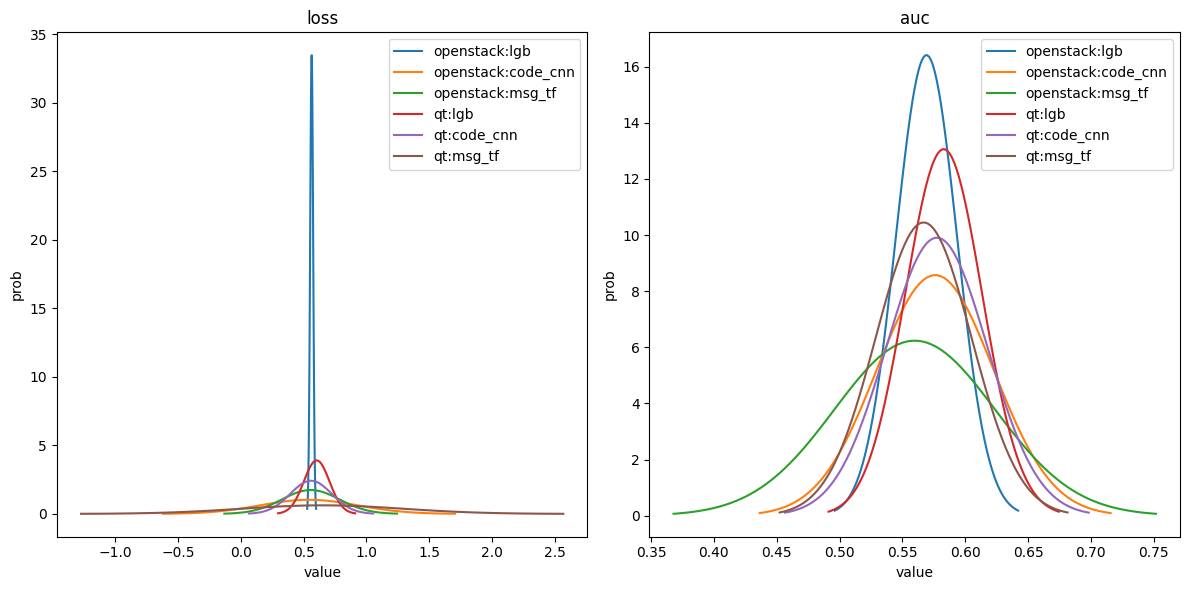

In [31]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 2,  figsize=(12, 6), tight_layout=True)

for index, row in df.iterrows():
    mean = row[['fold1', 'fold2', 'fold3','fold4']].mean()
    std_dev = row[['fold1', 'fold2', 'fold3','fold4']].std()
    x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    label = index[0]+':'+index[2]
    if index[1] == 'loss':
        axes[0].plot(x, y, label=label)
    else:
        axes[1].plot(x, y, label=label)
    
# プロットの表示
for i in range(2):
    axes[i].set_xlabel('value')
    axes[i].set_ylabel('prob')
    axes[i].legend(loc='upper right')
axes[0].set_title("loss") 
axes[1].set_title("auc")
plt.show()


In [32]:
df['mean'] = np.mean(df[['fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df['variance'] = np.var(df[[ 'fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)
df['std_dev'] = np.std(df[['fold1', 'fold2', 'fold3', 'fold4', 'fold5']], axis=1)

In [33]:
df

fold1     fold2     fold3     fold4     fold5  \
project   eval model                                                        
openstack loss lgb       0.563703  0.572838  0.571250  0.546798  0.631351   
               code_cnn  0.349677  0.088767  0.897529  0.828322  0.631297   
               msg_tf    0.855591  0.378173  0.615650  0.375668  0.629583   
          auc  lgb       0.545342  0.586808  0.551424  0.593225  0.609346   
               code_cnn  0.558487  0.591285  0.522815  0.631923  0.580951   
               msg_tf    0.465737  0.573724  0.599332  0.600643  0.643771   
qt        loss lgb       0.644887  0.638789  0.677985  0.452281  0.463491   
               code_cnn  0.793243  0.419408  0.546987  0.474245  0.635752   
               msg_tf    0.146611  0.260915  0.624763  1.556992 -0.033350   
          auc  lgb       0.589598  0.616295  0.542423  0.583306  0.554446   
               code_cnn  0.592453  0.627669  0.546769  0.543151  0.575745   
               msg_tf    0.563686  0.618279  0.526028  0.559698  0.617785   

                             mean  variance   std_dev  
project   eval model                                   
openstack loss lgb       0.577188  0.000819  0.028612  
               code_cnn  0.559118  0.091460  0.302423  
               msg_tf    0.570933  0.032351  0.179864  
          auc  lgb       0.577229  0.000612  0.024746  
               code_cnn  0.577092  0.001303  0.036097  
               msg_tf    0.576641  0.003581  0.059842  
qt        loss lgb       0.575487  0.009410  0.097007  
               code_cnn  0.573927  0.017292  0.131499  
               msg_tf    0.511186  0.319736  0.565452  
          auc  lgb       0.577214  0.000689  0.026255  
               code_cnn  0.577157  0.000973  0.031200  
               msg_tf    0.577095  0.001288  0.035894